<a href="https://colab.research.google.com/github/jarvis-create/Hamoye-Tasks-/blob/master/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from fbprophet import Prophet

In [ ]:
from fbprophet.plot import plot_yearly
from fbprophet.plot import plot_weekly

In [89]:
import pandas_profiling

In [103]:
ds=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip", sep = ';',low_memory=False, infer_datetime_format=True, parse_dates={'Timestamp': [0, 1]},index_col=['Timestamp'])

In [101]:
ds.head()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
ds.shape

(2075259, 7)

In [ ]:
ds.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [ ]:
df=ds

In [ ]:
df.replace('?', np.nan, inplace = True)

In [ ]:
df=df.astype(np.float32)

In [ ]:
df.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [ ]:
df.fillna(df.mean(), inplace= True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Timestamp,,,,,,,
2008-10-31 13:53:00,1.490,0.070,243.570007,6.2,0.0,0.0,18.0
2006-12-20 13:02:00,1.402,0.106,241.850006,5.8,0.0,0.0,18.0
2007-06-30 17:08:00,2.160,0.294,239.190002,10.0,8.0,1.0,18.0
2008-10-04 15:05:00,2.090,0.000,238.899994,8.6,0.0,1.0,18.0


In [ ]:
df.index[-1] - household_df.index[0]

Timedelta('1441 days 03:38:00')

In [91]:
# Resampling 
daily_rate_df=df.resample('D').sum()

In [ ]:
# daily_rate_df.head()

In [ ]:
daily_rate_df.shape

(1442, 7)

Text(0, 0.5, 'Global Active Power')

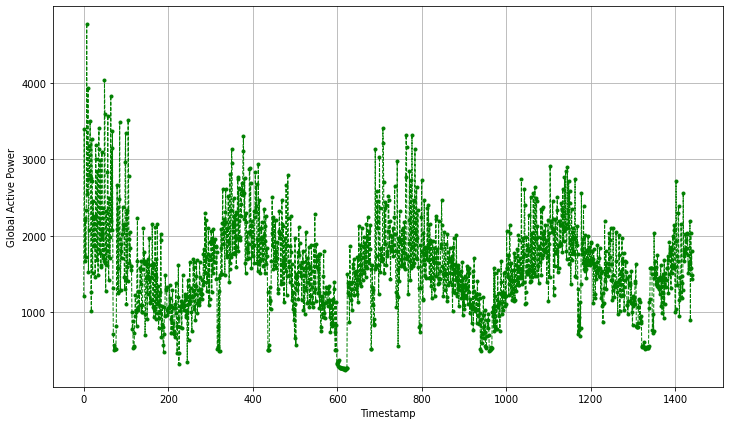

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(daily_rate_df.index, daily_rate_df.Global_active_power,'go--', linewidth=1, markersize=3)
plt.grid()
plt.xlabel('Timestamp')
plt.ylabel('Global Active Power')

In [ ]:
from scipy.stats import pearsonr
pearsonr(daily_rate_df['Global_active_power'],daily_rate_df['Global_reactive_power'])  

(0.04109788470945897, 0.11877325649336447)

In [ ]:
from scipy.stats import pearsonr
pearsonr(daily_rate_df['Voltage'],daily_rate_df['Global_intensity'])

(0.05221350712869457, 0.04743766648281252)

In [ ]:
daily_rate_df=daily_rate_df.reset_index()

In [ ]:
fp=daily_rate_df[['Timestamp','Global_active_power']]

In [ ]:
fp=fp.rename(columns = {'Timestamp':'ds','Global_active_power':'y'})
fp.sample(4)

,ds,y
1209,2010-04-08,1649.219971
759,2009-01-13,2182.600098
166,2007-05-31,938.549988
305,2007-10-17,1576.930054


In [ ]:
fp.shape

(1442, 2)

In [ ]:
train = fp.iloc[0:1077,:]
test = fp.iloc[1077:,:]

In [ ]:
print (train.shape)
print (test.shape)

(1077, 2)
(365, 2)


In [ ]:
fp_model=Prophet()

In [ ]:
fp_model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
prophecy=fp_model.predict(test)

In [ ]:
mape = sum(np.abs(np.array(test['y']) - np.array(prophecy['yhat']))/np.array(test['y']))/ len(test) *100
round(mape,1)

20.8

In [ ]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(prophecy['yhat'])))
round(rmse,1)

374.6

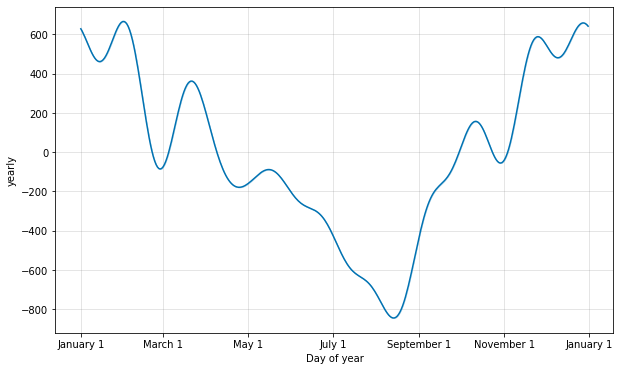

In [ ]:
plot_yearly(fp_model)

In [ ]:
daily_rate_df=daily_rate_df.reset_index()

In [ ]:
mv_p=daily_rate_df
mv_p.head()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
mv_p= mv_p.rename(columns = {'Timestamp':'ds','Global_active_power':'y','Global_reactive_power' : 'add1', 'Voltage' : 'add2', 'Global_intensity' : 'add3', 'Sub_metering_1':'add4', 'Sub_metering_2' :'add5', 'Sub_metering_3': 'add6'})
mv_p.head(5)

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
mv_train =mv_p.iloc[0:1077,:]
mv_test =mv_p.iloc[1077:,:]

In [ ]:
print (mv_train.shape)
print (mv_test.shape)

(1077, 8)
(365, 8)


In [ ]:
mv_model = Prophet()
mv_model.add_regressor('add1')
mv_model.add_regressor('add2')
mv_model.add_regressor('add3')
mv_model.add_regressor('add4')
mv_model.add_regressor('add5')
mv_model.add_regressor('add6')

In [ ]:
mv_model.fit(mv_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
mv_prophecy=mv_model.predict(mv_test)

In [ ]:
mape = np.mean(np.abs(np.array(mv_test['y']) -np.array(mv_prophecy['yhat']))/ np.array(mv_test['y'])) *100

In [106]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(mv_test['y']),np.array(mv_prophecy['yhat'])))
rmse

44.87909204303396

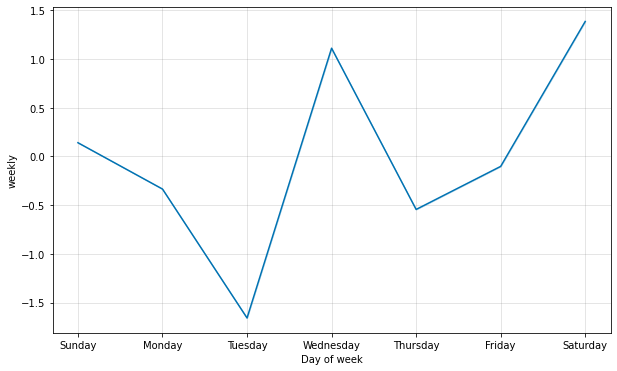

In [ ]:
plot_weekly(mv_model)